In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns

## Reading Data


In [2]:
df = pd.read_csv('salary-data-clean.csv')
df.head()

,job title,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,excel
0,Data Scientist 2,$52K - $95K,description\ndigital health and analytics with...,3.9,Humana,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,KY,59,1,0,1,0,0,0
1,Lead Data Scientist,$94K - $155K,description\nthe lead data scientist uses math...,3.9,Humana,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,Humana,MA,59,0,0,0,0,0,0
2,Data Scientist - Nutrisystem,$90K - $148K,description/responsibilities,2.7,Tivity Health,"Fort Washington, PA",201 to 500 Employees,1981,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,90,148,119.0,Tivity Health,PA,39,0,0,0,0,0,0
3,Data Scientist,$74K - $123K,data scientist\n\n\n\nlocation\n\n\n\natlanta ...,2.6,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),74,123,98.5,Purchasing Power,GA,19,0,0,0,0,0,0
4,Data Analyst,$36K - $65K,description:,4.1,Conservice,"Logan, UT",1001 to 5000 Employees,2000,Company - Private,Utilities,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),36,65,50.5,Conservice,UT,20,0,0,0,0,0,0


In [3]:
cols_to_drop = df.loc[:, (df == -1).all() | (df == 0).all()]
df.drop(cols_to_drop, inplace=True, axis=1)

## Extra Data Cleaning
Here we fix the title of the jobs, we also add a column name *seniority* that shows whether the job title is senior or not. 

In [4]:
def fix_title(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'senior' in title.lower() or 'snr' in title.lower() or 'sr' in title.lower() or 'manager' in title.lower() or\
    'director' in title.lower() or 'principle' in title.lower():
        return 'senior'
    elif 'junior' in title.lower() or 'jr' in title.lower():
        return 'junior'
    else:
        return 'na'        

In [5]:
df['job_title'] = df['job title'].apply(fix_title)
df['job_title'].value_counts()

data scientist    548
na                228
data engineer      72
mle                22
manager            18
director           12
Name: job_title, dtype: int64

In [6]:
df['seniority'] = df['job title'].apply(seniority)
df['seniority'].value_counts()

na        746
senior    148
junior      6
Name: seniority, dtype: int64

In [7]:
df.head()

,job title,salary estimate,job description,rating,company name,location,size,founded,type of ownership,industry,sector,revenue,min_salary,max_salary,avg_salary,company_txt,job_state,age,python,R,spark,aws,cloud,job_title,seniority
0,Data Scientist 2,$52K - $95K,description\ndigital health and analytics with...,3.9,Humana,"Louisville, KY",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),52,95,73.5,Humana,KY,59,1,0,1,0,0,data scientist,na
1,Lead Data Scientist,$94K - $155K,description\nthe lead data scientist uses math...,3.9,Humana,"Boston, MA",10000+ Employees,1961,Company - Public,Insurance Carriers,Insurance,$10+ billion (USD),94,155,124.5,Humana,MA,59,0,0,0,0,0,data scientist,na
2,Data Scientist - Nutrisystem,$90K - $148K,description/responsibilities,2.7,Tivity Health,"Fort Washington, PA",201 to 500 Employees,1981,Company - Public,Health Care Services & Hospitals,Health Care,Unknown / Non-Applicable,90,148,119.0,Tivity Health,PA,39,0,0,0,0,0,data scientist,na
3,Data Scientist,$74K - $123K,data scientist\n\n\n\nlocation\n\n\n\natlanta ...,2.6,Purchasing Power,"Atlanta, GA",201 to 500 Employees,2001,Company - Private,Financial Transaction Processing,Finance,$100 to $500 million (USD),74,123,98.5,Purchasing Power,GA,19,0,0,0,0,0,data scientist,na
4,Data Analyst,$36K - $65K,description:,4.1,Conservice,"Logan, UT",1001 to 5000 Employees,2000,Company - Private,Utilities,"Oil, Gas, Energy & Utilities",$50 to $100 million (USD),36,65,50.5,Conservice,UT,20,0,0,0,0,0,na,na


We now drop the extra columns

In [8]:
df.drop('job title', axis=1, inplace=True)

We find the length of job description for each job.

In [9]:
df['desc_len'] = df['job description'].apply(lambda x: len(x))
df['desc_len']

0      3525
1      2220
2        28
3       121
4        12
       ... 
895       9
896     410
897    5338
898       5
899     585
Name: desc_len, Length: 900, dtype: int64

## EDA

In [10]:
df.describe()

,rating,founded,min_salary,max_salary,avg_salary,age,python,R,spark,aws,cloud,desc_len
count,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000,900.000000
mean,3.431556,1621.677778,92.807778,153.354444,123.081111,27.622222,0.216667,0.001111,0.068889,0.082222,0.080000,1270.541111
std,1.515021,769.993478,27.590719,43.532376,35.329446,36.280264,0.412203,0.033333,0.253406,0.274856,0.271444,1791.620384
min,-1.000000,-1.000000,33.000000,59.000000,46.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,3.375000,1923.750000,65.000000,111.000000,87.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,19.000000
50%,3.800000,1994.000000,94.000000,158.000000,124.250000,15.000000,0.000000,0.000000,0.000000,0.000000,0.000000,349.000000
75%,4.200000,2008.000000,111.000000,186.000000,148.000000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2413.250000
max,5.000000,2020.000000,145.000000,239.000000,192.000000,203.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9654.000000


We want to see the histogram of our numerical variables.

In [11]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python', 'R', 'spark', 'aws',
       'cloud', 'job_title', 'seniority', 'desc_len'],
      dtype='object')

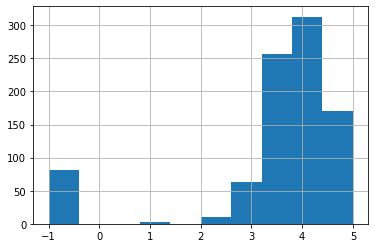

In [12]:
df['rating'].hist();

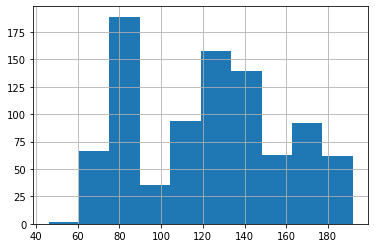

In [13]:
df['avg_salary'].hist(bins=10);

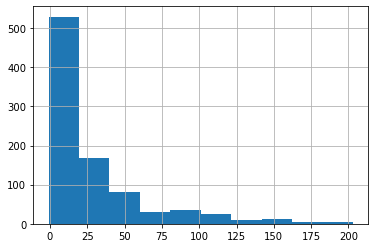

In [14]:
df['age'].hist();

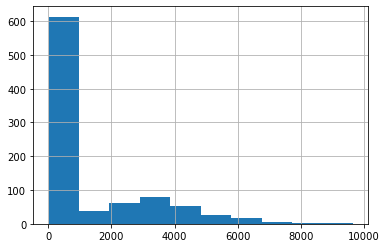

In [15]:
df['desc_len'].hist();

We can also use boxplot to see the distribution of numerical variables.

<AxesSubplot:>

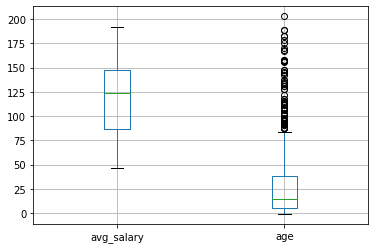

In [16]:
df.boxplot(column=['avg_salary', 'age'])

<AxesSubplot:>

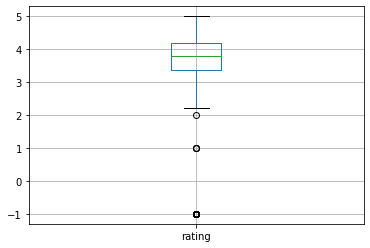

In [17]:
df.boxplot(column='rating')

We now take a look at correlations between numerical variables.

In [18]:
corr = df[['avg_salary', 'age', 'rating', 'desc_len']].corr()
corr

,avg_salary,age,rating,desc_len
avg_salary,1.000000,-0.007369,0.009723,-0.011555
age,-0.007369,1.000000,0.181395,0.144457
rating,0.009723,0.181395,1.000000,0.085231
desc_len,-0.011555,0.144457,0.085231,1.000000


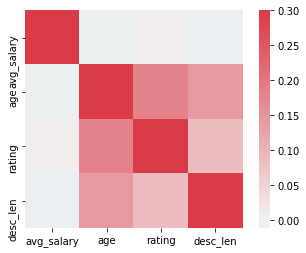

In [19]:
cmap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(corr, cmap = cmap, vmax=.3, center=0, square=True);

The above chart shows that there is relatively high correlation between *rating* and 'age', also between 'desc_len' and 'age'. 

Now we visualize categorical variables.

In [20]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python', 'R', 'spark', 'aws',
       'cloud', 'job_title', 'seniority', 'desc_len'],
      dtype='object')

graph for size, total=9


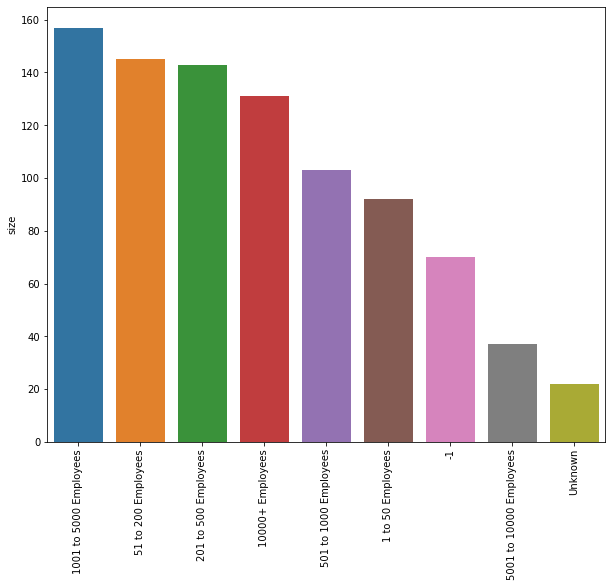

graph for type of ownership, total=12


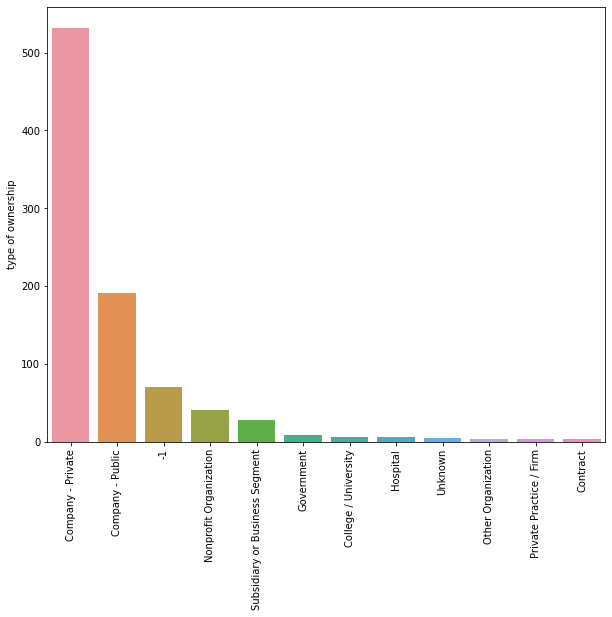

graph for sector, total=23


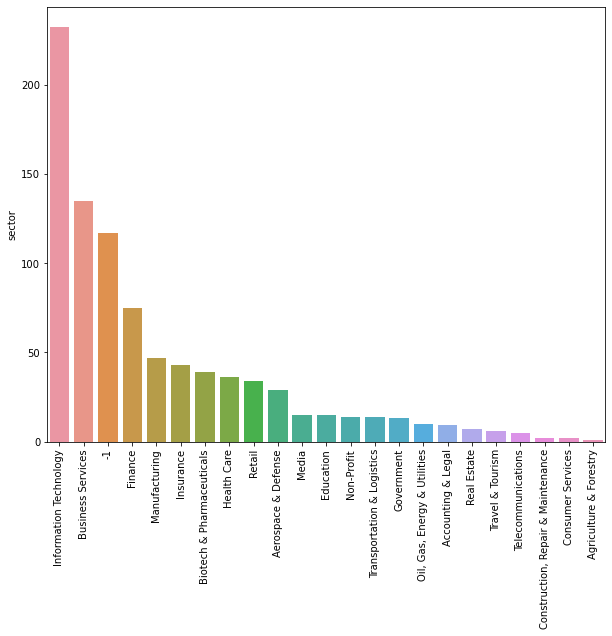

graph for seniority, total=3


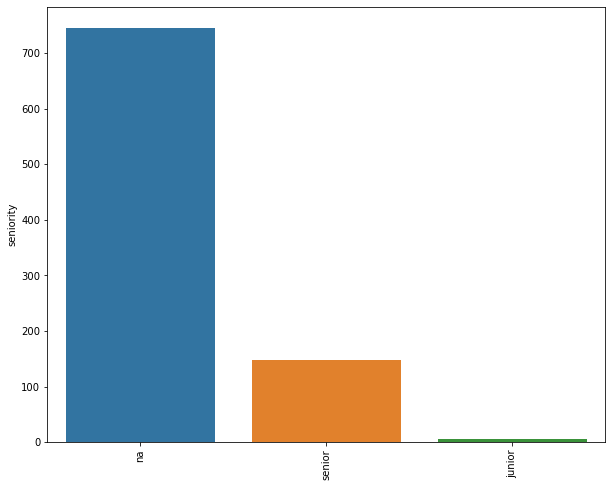

graph for job_state, total=47


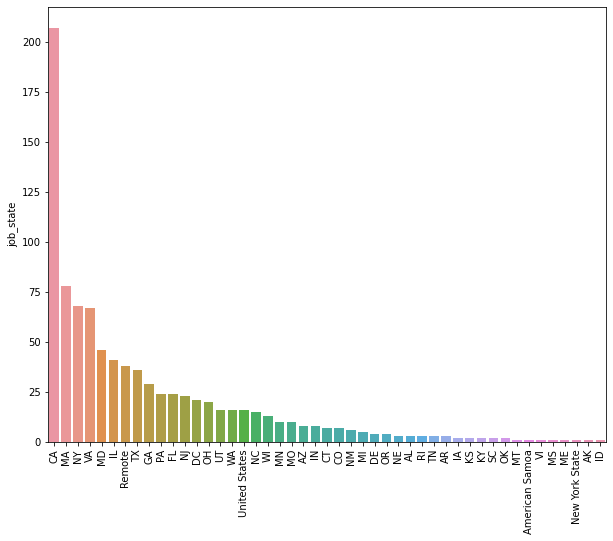

In [21]:
df_cat = df[['size', 'type of ownership', 'sector', 'seniority', 'job_state']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

For better visualisation in high-dimensional variables, we select top 20 variables and visualise those variables.

graph for company_txt, total=20


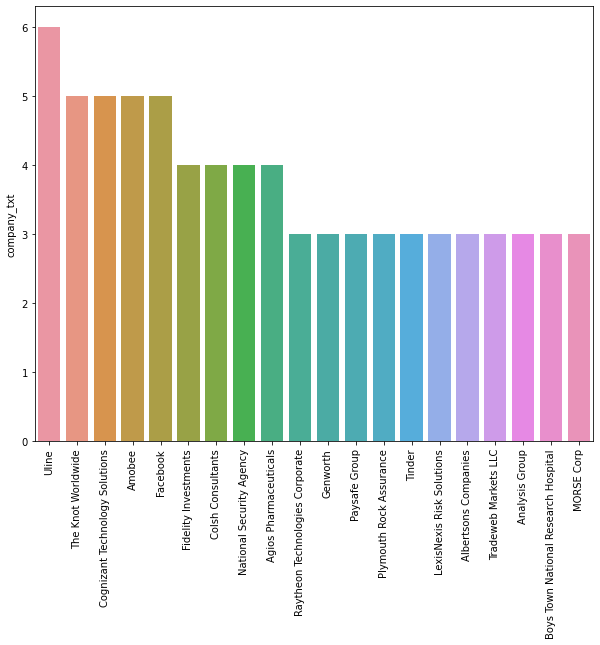

graph for location, total=20


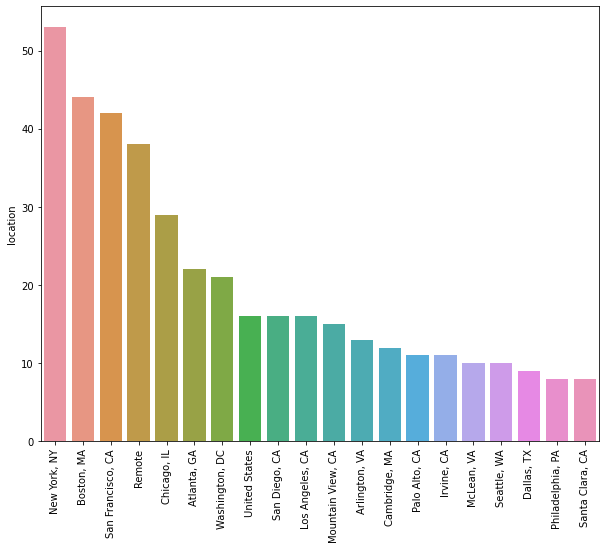

In [22]:
df_cat = df[['company_txt', 'location']]
for name in df_cat.columns:
    cat_num = df_cat[name].value_counts()[:20]
    print(f'graph for {name}, total={len(cat_num)}')
    plt.figure(figsize=(10, 8))
    graph = sns.barplot(x=cat_num.index, y=cat_num)
    graph.set_xticklabels(graph.get_xticklabels(), rotation=90)
    plt.show()

In [23]:
pd.pivot_table(index = ['job_state'], values='avg_salary', data=df).sort_values('avg_salary', ascending=False)[:5]

,avg_salary
job_state,
RI,161.500000
AR,153.166667
OK,151.250000
NC,148.633333
MO,137.350000


In [24]:
df.columns

Index(['salary estimate', 'job description', 'rating', 'company name',
       'location', 'size', 'founded', 'type of ownership', 'industry',
       'sector', 'revenue', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'age', 'python', 'R', 'spark', 'aws',
       'cloud', 'job_title', 'seniority', 'desc_len'],
      dtype='object')

In [25]:
df_pivots = df[['rating', 'industry', 'sector', 'revenue', 'python', 'R', 
                'spark', 'aws', 'cloud', 'type of ownership', 'avg_salary']]

for i in df_pivots.columns[:-1]:
    print(i)
    print(pd.pivot_table(df_pivots, index=i, values='avg_salary').sort_values(by='avg_salary', ascending=False))

rating
        avg_salary
rating            
 1.0    165.666667
 2.2    144.000000
 3.0    138.333333
 2.8    136.562500
 4.4    136.519231
 4.3    133.488095
 4.8    128.550000
 3.3    127.474359
 3.8    126.279661
 3.7    125.937500
 3.9    123.738462
 3.5    123.316327
 4.2    123.293478
 4.9    123.083333
 5.0    122.919355
 4.1    122.701923
-1.0    122.591463
 4.5    121.384615
 3.4    121.016129
 3.1    119.452381
 4.0    118.867347
 2.7    118.833333
 3.6    117.206349
 3.2    115.018519
 4.7    114.531250
 4.6    112.404762
 2.9    108.800000
 2.6    107.312500
 2.5    104.285714
 2.3     93.750000
 2.0     79.000000
industry
                                          avg_salary
industry                                            
Health, Beauty, & Fitness                      176.5
Food & Beverage Stores                         176.5
Motion Picture Production & Distribution       162.5
Transportation Management                      154.0
Insurance Agencies & Brokerages        

In [26]:
pd.pivot_table(df_pivots, index='revenue', columns=['python'], values=['avg_salary'], aggfunc='count')

avg_salary    
python                                    0   1
revenue                                        
$1 to $2 billion (USD)                   36   7
$1 to $5 million (USD)                   19   9
$10 to $25 million (USD)                 31   8
$10+ billion (USD)                       53  26
$100 to $500 million (USD)               83  15
$2 to $5 billion (USD)                   19   6
$25 to $50 million (USD)                 32  13
$5 to $10 billion (USD)                  18  13
$5 to $10 million (USD)                  10   7
$50 to $100 million (USD)                53  12
$500 million to $1 billion (USD)         34   5
-1                                       66   5
Less than $1 million (USD)               32  15
Unknown / Non-Applicable                219  54

In [27]:
df.to_csv('data-eda.csv', index=False)